importing:

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

loading dataset:

In [6]:
dataset = pd.read_csv('https://data.wprdc.org/datastore/dump/76fda9d0-69be-4dd5-8108-0de7907fc5a4', index_col = "REQUEST_ID")
dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
203364.0,2017-12-15T14:53:00,Street Obstruction/Closure,Call Center,1,DOMI - Permits,Central Northside,1.0,22.0,4.200322e+10,1.0,22.0,1.0,1-7,-80.016716,40.454144,EXACT
200800.0,2017-11-29T09:54:00,Graffiti,Control Panel,1,Police - Zones 1-6,South Side Flats,3.0,16.0,4.200316e+10,3.0,16.0,3.0,4-24,-79.969952,40.429243,APPROXIMATE
201310.0,2017-12-01T13:23:00,Litter,Call Center,1,DPW - Street Maintenance,Troy Hill,1.0,24.0,4.200324e+10,1.0,24.0,1.0,1-2,-79.985859,40.459716,EXACT
200171.0,2017-11-22T14:54:00,Water Main Break,Call Center,1,Pittsburgh Water and Sewer Authority,Banksville,2.0,20.0,4.200320e+10,5.0,20.0,6.0,4-9,-80.034210,40.406969,EXACT
193043.0,2017-10-12T12:46:00,Guide Rail,Call Center,1,DPW - Construction Division,East Hills,9.0,13.0,4.200313e+10,2.0,13.0,5.0,3-19,-79.876582,40.451226,EXACT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479949.0,2020-11-22T17:03:00,Abandoned Vehicle (parked on street),Website,0,Police - AVU,Crafton Heights,2.0,28.0,4.200328e+10,5.0,28.0,6.0,1-17,-80.050053,40.446114,APPROXIMATE
479950.0,2020-11-22T17:27:00,Illegal Dumping,Website,0,DOMI - Permits,Bloomfield,7.0,9.0,4.200309e+10,2.0,9.0,5.0,3-6,-79.955674,40.463833,APPROXIMATE
479951.0,2020-11-22T21:09:00,Broken Sidewalk,Website,0,"Permits, Licenses and Inspections",Garfield,9.0,11.0,4.200311e+10,2.0,11.0,5.0,3-4,-79.931298,40.465390,EXACT


overall count for which neighborhood has most 311 calls:

In [7]:
totalentries = len(dataset)

dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)

Brookline               18395
Carrick                 17417
Squirrel Hill South     15208
South Side Slopes       14816
South Side Flats        13879
                        ...  
East Carnegie             429
Northview Heights         421
Glen Hazel                294
Arlington Heights          87
Mount Oliver Borough       59
Name: NEIGHBORHOOD, Length: 91, dtype: int64

this is a lot of data, and not all of it may be relevant currently

in the data dictionary, a status of 0 means its a new entry

we can use a filter to only get entries with a status of 0, meaning it is new

In [8]:
filtered_dataset = dataset[dataset.STATUS == 0]
filtered_dataset

,CREATED_ON,REQUEST_TYPE,REQUEST_ORIGIN,STATUS,DEPARTMENT,NEIGHBORHOOD,COUNCIL_DISTRICT,WARD,TRACT,PUBLIC_WORKS_DIVISION,PLI_DIVISION,POLICE_ZONE,FIRE_ZONE,X,Y,GEO_ACCURACY
REQUEST_ID,,,,,,,,,,,,,,,,
179176.0,2017-08-14T14:00:00,Neighborhood Issues,Control Panel,0,NaN,Middle Hill,6.0,5.0,4.200305e+10,3.0,5.0,2.0,2-1,-79.977726,40.446142,APPROXIMATE
182748.0,2017-08-28T12:49:00,Abandoned Vehicle (parked on street),Control Panel,0,Police - AVU,Brighton Heights,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.029944,40.486596,APPROXIMATE
184662.0,2017-09-05T13:49:00,Abandoned Vehicle (parked on street),Call Center,0,Police - AVU,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,27.0,1.0,1-14,-80.027634,40.470334,APPROXIMATE
185902.0,2017-09-11T13:49:00,Parks Trails,Call Center,0,DPW - Park Maintenance,NaN,6.0,1.0,4.200302e+10,NaN,1.0,NaN,1-4,-80.005966,40.438043,EXACT
167825.0,2017-07-06T15:26:00,Illegal Dumping,Control Panel,0,DOMI - Permits,East Allegheny,1.0,23.0,4.200356e+10,1.0,23.0,1.0,1-20,-79.997763,40.452695,APPROXIMATE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479949.0,2020-11-22T17:03:00,Abandoned Vehicle (parked on street),Website,0,Police - AVU,Crafton Heights,2.0,28.0,4.200328e+10,5.0,28.0,6.0,1-17,-80.050053,40.446114,APPROXIMATE
479950.0,2020-11-22T17:27:00,Illegal Dumping,Website,0,DOMI - Permits,Bloomfield,7.0,9.0,4.200309e+10,2.0,9.0,5.0,3-6,-79.955674,40.463833,APPROXIMATE
479951.0,2020-11-22T21:09:00,Broken Sidewalk,Website,0,"Permits, Licenses and Inspections",Garfield,9.0,11.0,4.200311e+10,2.0,11.0,5.0,3-4,-79.931298,40.465390,EXACT


and once again sorting by most entries

In [9]:
nbhcount = filtered_dataset['NEIGHBORHOOD'].value_counts().sort_values(ascending = False)
nbhcount

Brookline                    1213
Central Business District     983
Carrick                       826
Mount Washington              812
Beechview                     798
                             ... 
Northview Heights              24
St. Clair                      24
Chartiers City                 18
Mount Oliver Borough           10
Arlington Heights               2
Name: NEIGHBORHOOD, Length: 91, dtype: int64

as a graph

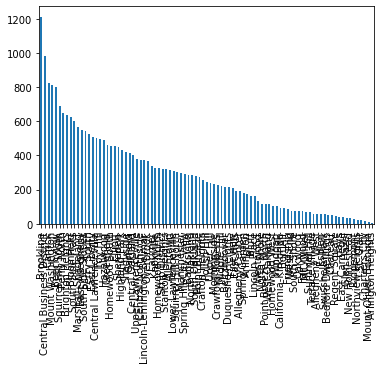

In [10]:
nbhcount.plot.bar()

graphs, but for most and least:

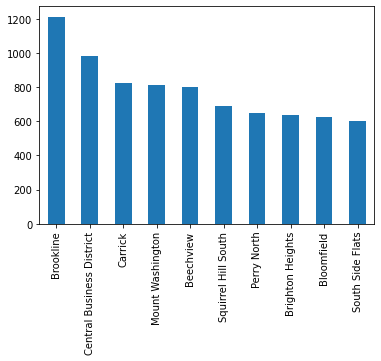

In [11]:
nbhcount.head(10).plot.bar()

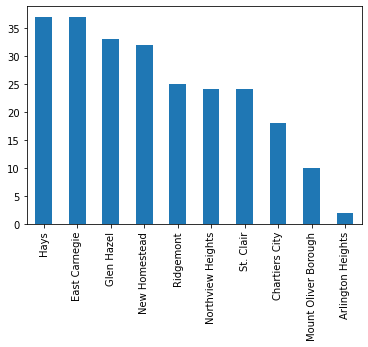

In [12]:
nbhcount.tail(10).plot.bar()

comparison between most and least 10

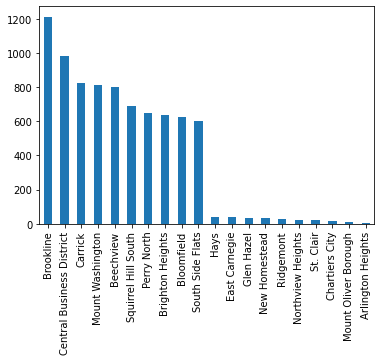

In [17]:
mostandleast = nbhcount.head(10).append(nbhcount.tail(10))
mostandleast.plot.bar()

Conclusion:
Mt. Oliver Borough ends up being the "best" neighborhood by our chosen criterias. My chosen dataset was for 311 calls, which are generally for rather minor issues, but still are things that add up after a while, as can be seen in the massive amount of entries in the dataset. While Mt. Oliver Borough did not score the best for 311 (which would be having least amount of calls), it scored second best and combined with the other metrics made it the "best" in terms of "quietness". The criterias chosen by us do favor smaller neighborhoods, but that sort of ended up as a side effect and naturally it makes sense for smaller neighborhoods to be more peaceful and quiet.